<a href="https://colab.research.google.com/github/gabrielsantosds/estatistica_aplicada/blob/main/Estat%C3%ADstica_Aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amostragem**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Data Science/Datasets/Stephen Klosterman - Datasets/default_of_credit_card_clients__courseware_version_1_21_19.xls")

In [ ]:
df.value_counts()

ID             LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1          PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month
00026e48-d7d5  300000     2    1          2         31   -2             -2     -2     -2     -2     -2     1555       1599       900        11019      3452       57848      1603      902       11117     3462      58418     16994     0                             1
a9655b97-ade2  130000     2    2          2         33   Not available   0      0      0      0      0     79579      70067      63951      57467      51614      46071      2702      2207      2000      1717      1770      1245      0                             1
a97f8032-506b  210000     2    2          1         52   0               0     -1      0     -1     -1     5723       3386       8964       2241       2241       2241       1237      4482      0         2241   

In [ ]:
df["default payment next month"].value_counts()

0    23438
1     6562
Name: default payment next month, dtype: int64

In [ ]:
p0 = 6562/(6562+23438)
p0

0.21873333333333334

**Amostragem aleatória simples**

In [ ]:
df_sample = df.sample(frac = 0.2)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 4320 to 12050
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          6000 non-null   object
 1   LIMIT_BAL                   6000 non-null   int64 
 2   SEX                         6000 non-null   int64 
 3   EDUCATION                   6000 non-null   int64 
 4   MARRIAGE                    6000 non-null   int64 
 5   AGE                         6000 non-null   int64 
 6   PAY_1                       6000 non-null   object
 7   PAY_2                       6000 non-null   int64 
 8   PAY_3                       6000 non-null   int64 
 9   PAY_4                       6000 non-null   int64 
 10  PAY_5                       6000 non-null   int64 
 11  PAY_6                       6000 non-null   int64 
 12  BILL_AMT1                   6000 non-null   int64 
 13  BILL_AMT2                   6000 non-null   

**Amostragem Estratificada**

In [ ]:
y = df["default payment next month"]
X = df.drop("default payment next month", axis =1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.70, random_state = 42)

y_test.value_counts()

0    16407
1     4593
Name: default payment next month, dtype: int64

In [ ]:
pr = y_test.value_counts()[y_test != 0]/len(y_test)
p

In [46]:
r = p/p0

r

# A proporção se mantém a mesma em uma precição de 99,99%

0    3.571864
1    0.999913
Name: default payment next month, dtype: float64

# **Variância e desvio padrão**

**Correção de Bessel**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [ ]:
np.random.seed(2)


In [ ]:
float vetor[1,3,4,5]

SyntaxError: ignored

In [ ]:
pop_million_points, ignore_classes = make_gaussian_quantiles(n_samples=1000000, n_features = 2, cov=1, n_classes=1)

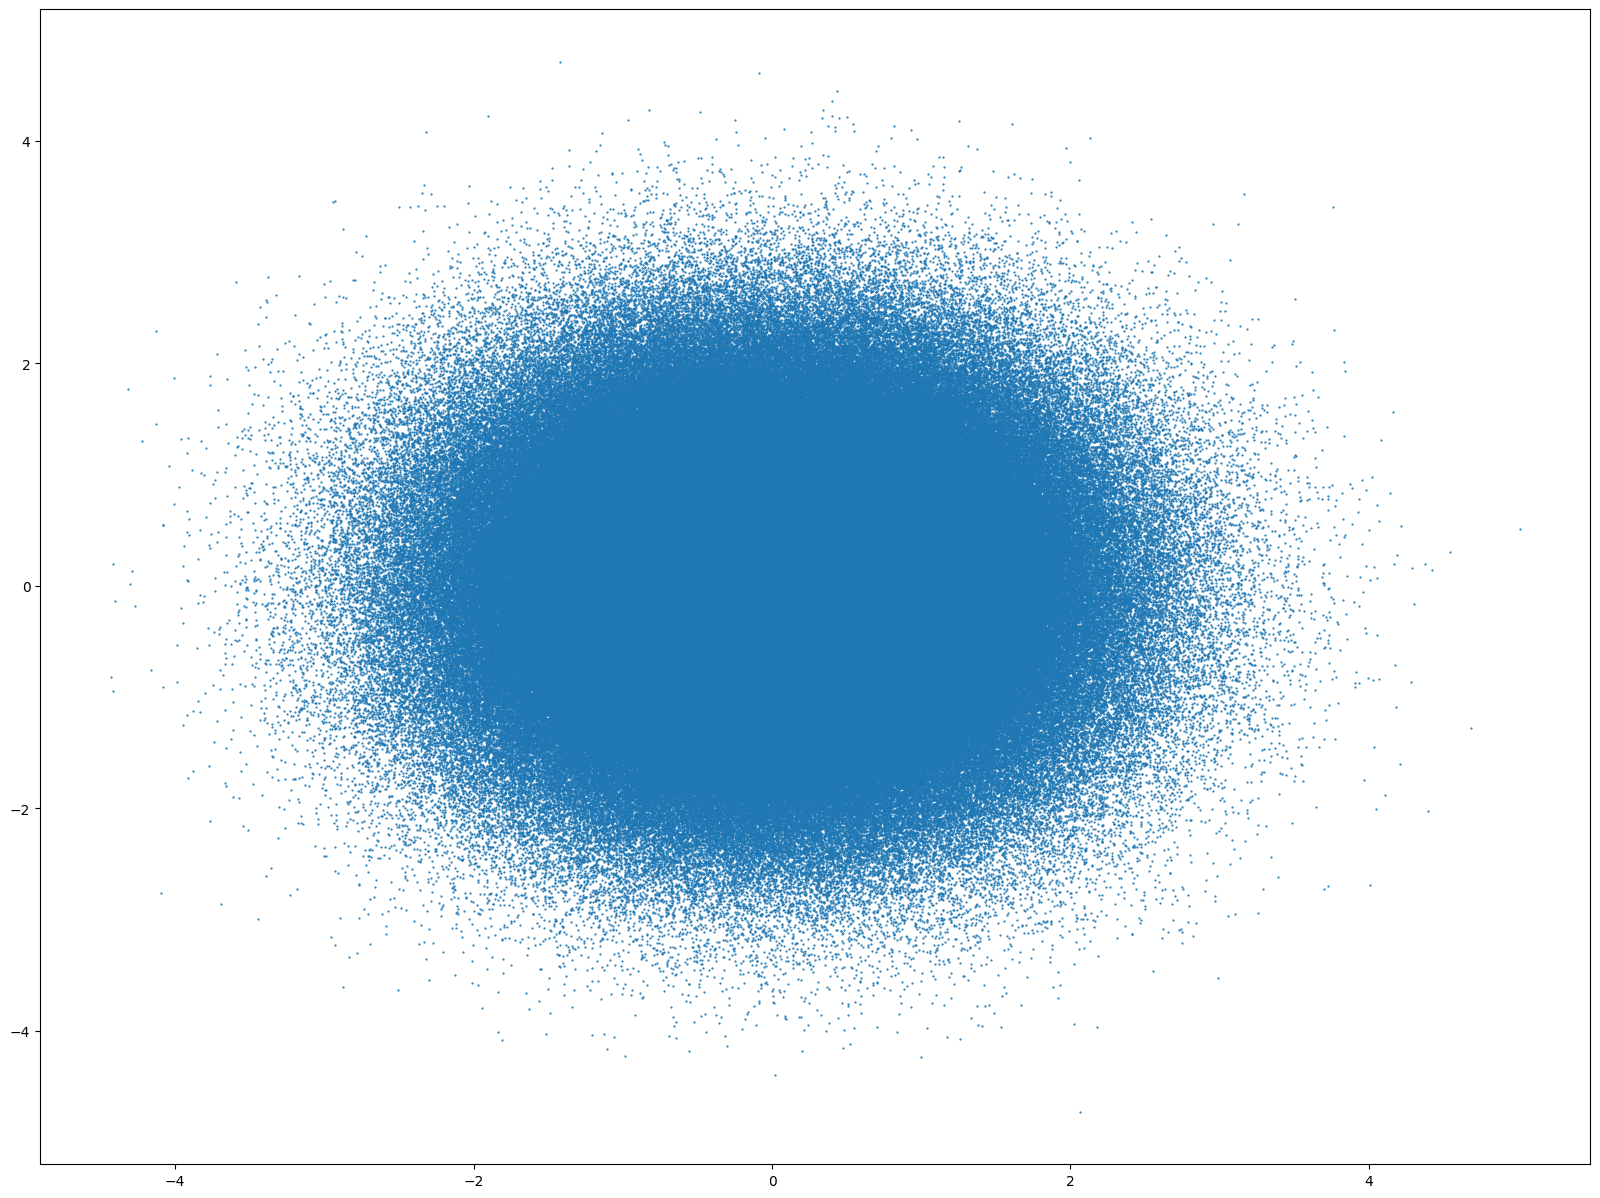

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(pop_million_points[:,0], pop_million_points[:,1], s=0.4, alpha=0.9)
plt.show()

In [ ]:
under_1_pop = 0
for i in pop_million_points:
    if -1 <= i[0] <= 1:
        under_1_pop += 1

In [ ]:
rand10 = np.random.choice(range(1000000), 10)
sample10 = np.array([pop_million_points[i] for i in rand10])

In [ ]:
under_1_std_10 = 0
over_1_std_10 = 0
for i in sample10:
    if -1 <= i[0] <= 1:
        under_1_std_10 += 1
    else:
        over_1_std_10 += 1

In [ ]:
under_1_std_10

4

In [ ]:
over_1_std_10

6

In [ ]:
rand100 = np.random.choice(range(1000000), 100)
sample100 = np.array([pop_million_points[i] for i in rand100])

In [ ]:
under_1_std_100 = 0
over_1_std_100 = 0
for i in sample100:
    if -1 <= i[0] <= 1:
        under_1_std_100 += 1
    else:
        over_1_std_100 += 1

In [ ]:
under_1_std_100

67

In [ ]:
over_1_std_100

33

In [ ]:
sample10[:,0].mean()

-0.531292336770721

In [ ]:
sample100[:,0].mean()

0.043327475016055016

In [ ]:
pop_million_points[:,0].mean()

-0.001048240684548686

In [ ]:
np.std(sample10[:,0]) # 10-point sample without the correction, using just n

1.1980106362484473

In [ ]:
np.std(sample10[:,0], ddof=1) # 10-point sample with the correction, using n-1

1.2628140905508571

In [ ]:
np.std(sample100[:, 0], ddof=1) # 100-point sample with the correction, using n-1

1.0465611639780033

In [ ]:
np.std(pop_million_points[:,0]) # the true population standard deviation

1.0007150764841548